In [1]:
%load_ext autoreload
%autoreload 2

# add the parent directory in the path to import the packages
import sys
sys.path.append('../')

from WaterClassification.Radiometry import RadiometryDB
from WaterClassification.common import *
from WaterClassification.Fitting import BaseFit

from functools import partial

 ## Load the Database

In [2]:
# Open the Radiometry Database
db = RadiometryDB(r'D:\OneDrive - Agência Nacional de Águas\Data\GET-RadiometryDB')

db.load_radiometries(r_types=['Rrs', 'Rrs_OSOAA'], 
                     norm=True,                                                        # create the normalized bands and also the area
                     funcs=partial(calc_area, col_name='flatness', norm_band='700'),   # create the flatness band
                     qry="SPM > 0 and Status != 'Deleted' and Status != 'Suspicious'"  # clear deleted and no data
                    )
rrs = db.rdmtries['Rrs']

rrs.head(3)

Radiometries ['Rrs', 'Rrs_OSOAA'] loaded in dictionary .rdmtries


,Area_2,Station_2,Measurement,Start_Date_2,SPM_2,Status_2,Description_2,319,320,321,...,n943,n944,n945,n946,n947,n948,n949,n950,n951,flatness
Id,,,,,,,,,,,,,,,,,,,,,
0,Descoberto,Ponto_1,20160318-1139,2016-03-18 11:39:00,7.0,Ok,GIANCARLO_ CAMP1_1,NaN,0.003272,0.003054,...,0.000138,0.000127,0.000149,0.000184,0.000180,0.000186,0.000191,0.000213,NaN,-1.480905
1,Descoberto,Ponto_2,20160318-1214,2016-03-18 12:14:00,8.4,Ok,GIANCARLO_ CAMP1_2,NaN,0.002663,0.002460,...,0.000193,0.000212,0.000206,0.000210,0.000192,0.000204,0.000186,0.000189,NaN,-1.484569
2,Descoberto,Ponto_3,20160318-1228,2016-03-18 12:28:00,5.8,Ok,GIANCARLO_ CAMP1_3,NaN,0.003356,0.003116,...,0.000143,0.000146,0.000142,0.000146,0.000158,0.000165,0.000162,0.000154,NaN,-1.755808


In [3]:
# deleting outliers
rrs.drop(index=[410, 418, 390, 520, 409, 658], inplace=True, errors='ignore')
len(rrs)

869

In [4]:
from WaterClassification.Classification.clustering import *

In [5]:
clustering = ClusteringEngine(rrs, s2bands, 2)

In [6]:
clustering.summary()

{1: 507, 0: 362}

In [7]:
clustering.fit(s2bands, BaseFit.available_funcs)

In [8]:
clustering.summary()

Clustering (n=2) with 2 fits
Functions: [Linear, Exponential, Power, Nechad]
Bands: ['443', '490', '560', '665', '705', '740', '783', '842', '865', '940']


,func,band,R^2,MSE,RMSE,RMSLE,SSE,params,qty
1,Exponential,665,0.0866,4126.1291,64.2350,0.8367,2.091947e+06,"[805.4254550993288, -808.9590630003794]",507
0,Linear,865,0.3689,70133.4665,264.8272,0.6721,2.538831e+07,"[19488.071252545742, -59.260374646936015]",362
overall,NaN,NaN,0.5786,31622.8566,177.8282,0.7724,2.748026e+07,None,869


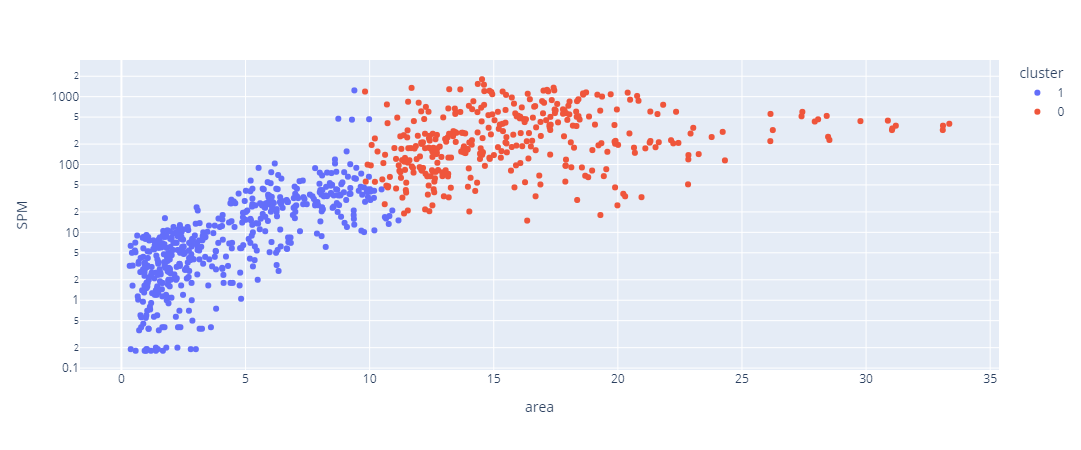

In [10]:
clustering.plot_clustering(x='area', log_y=True)

# MultiCluster tests
## Test 1

In [ ]:
cluster_bands = all_wls
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7))
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.plot_clustering(x='area', log_y=True)

In [27]:
mcluster.summary()

{'cluster_features': ['450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'

,1,2,3,4,5,6
R^2,0.4603,0.8979,0.898,0.9024,0.927,0.9278
MSE,40498.6,7663.22,7657.81,7323.04,5475.3,5418.81
RMSE,201.243,87.5398,87.5089,85.5748,73.9953,73.6126
RMSLE,1.1131,0.6266,0.5015,0.4966,0.4926,0.4869
SSE,3.51933e+07,6.65934e+06,6.65464e+06,6.36372e+06,4.75804e+06,4.70895e+06


## Test 2

In [ ]:
cluster_bands = all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7))
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.plot_clustering(x='area', log_y=True)

In [29]:
mcluster.summary()

{'cluster_features': ['n450', 'n451', 'n452', 'n453', 'n454', 'n455', 'n456', 'n457', 'n458', 'n459', 'n460', 'n461', 'n462', 'n463', 'n464', 'n465', 'n466', 'n467', 'n468', 'n469', 'n470', 'n471', 'n472', 'n473', 'n474', 'n475', 'n476', 'n477', 'n478', 'n479', 'n480', 'n481', 'n482', 'n483', 'n484', 'n485', 'n486', 'n487', 'n488', 'n489', 'n490', 'n491', 'n492', 'n493', 'n494', 'n495', 'n496', 'n497', 'n498', 'n499', 'n500', 'n501', 'n502', 'n503', 'n504', 'n505', 'n506', 'n507', 'n508', 'n509', 'n510', 'n511', 'n512', 'n513', 'n514', 'n515', 'n516', 'n517', 'n518', 'n519', 'n520', 'n521', 'n522', 'n523', 'n524', 'n525', 'n526', 'n527', 'n528', 'n529', 'n530', 'n531', 'n532', 'n533', 'n534', 'n535', 'n536', 'n537', 'n538', 'n539', 'n540', 'n541', 'n542', 'n543', 'n544', 'n545', 'n546', 'n547', 'n548', 'n549', 'n550', 'n551', 'n552', 'n553', 'n554', 'n555', 'n556', 'n557', 'n558', 'n559', 'n560', 'n561', 'n562', 'n563', 'n564', 'n565', 'n566', 'n567', 'n568', 'n569', 'n570', 'n571', 'n

,1,2,3,4,5,6
R^2,0.4603,0.5602,0.5534,0.8897,0.8897,0.8903
MSE,40498.6,33003.2,33516.1,8280.29,8280.28,8235.3
RMSE,201.243,181.668,183.074,90.9961,90.9961,90.7485
RMSLE,1.1131,0.9602,0.8586,0.5172,0.517,0.4995
SSE,3.51933e+07,2.86798e+07,2.91255e+07,7.19557e+06,7.19556e+06,7.15647e+06


## Test 3

In [ ]:
wls = wavelength_range(500, 850)
wls_norm = [f'n{b}' for b in wls]

cluster_bands = wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7))
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.plot_clustering(x='area', log_y=True)

In [32]:
mcluster.summary()

{'cluster_features': ['n500', 'n501', 'n502', 'n503', 'n504', 'n505', 'n506', 'n507', 'n508', 'n509', 'n510', 'n511', 'n512', 'n513', 'n514', 'n515', 'n516', 'n517', 'n518', 'n519', 'n520', 'n521', 'n522', 'n523', 'n524', 'n525', 'n526', 'n527', 'n528', 'n529', 'n530', 'n531', 'n532', 'n533', 'n534', 'n535', 'n536', 'n537', 'n538', 'n539', 'n540', 'n541', 'n542', 'n543', 'n544', 'n545', 'n546', 'n547', 'n548', 'n549', 'n550', 'n551', 'n552', 'n553', 'n554', 'n555', 'n556', 'n557', 'n558', 'n559', 'n560', 'n561', 'n562', 'n563', 'n564', 'n565', 'n566', 'n567', 'n568', 'n569', 'n570', 'n571', 'n572', 'n573', 'n574', 'n575', 'n576', 'n577', 'n578', 'n579', 'n580', 'n581', 'n582', 'n583', 'n584', 'n585', 'n586', 'n587', 'n588', 'n589', 'n590', 'n591', 'n592', 'n593', 'n594', 'n595', 'n596', 'n597', 'n598', 'n599', 'n600', 'n601', 'n602', 'n603', 'n604', 'n605', 'n606', 'n607', 'n608', 'n609', 'n610', 'n611', 'n612', 'n613', 'n614', 'n615', 'n616', 'n617', 'n618', 'n619', 'n620', 'n621', 'n

,1,2,3,4,5,6
R^2,0.4603,0.5604,0.6074,0.6074,0.8887,0.8926
MSE,40498.6,32989.7,29457.8,29457.8,8350.95,8056.61
RMSE,201.243,181.631,171.633,171.633,91.3835,89.7586
RMSLE,1.1131,0.9489,0.7625,0.7613,0.5299,0.4915
SSE,3.51933e+07,2.8668e+07,2.55989e+07,2.55989e+07,7.25697e+06,7.00119e+06


## Test 4

In [ ]:
cluster_bands = all_wls
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Robust')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.plot_clustering(x='area', log_y=True)

In [34]:
mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.8906,0.8906,0.8957,0.9249,0.9255
MSE,40498.6,8211.26,8207.48,7823.75,5636.8,5587.4
RMSE,201.243,90.616,90.5951,88.4519,75.0786,74.7489
RMSLE,1.1131,0.6257,0.546,0.5473,0.5378,0.5312
SSE,3.51933e+07,7.13558e+06,7.1323e+06,6.79884e+06,4.89838e+06,4.85545e+06
qty,869,869,869,869,869,869


## Test 5

In [ ]:
cluster_bands = all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Robust')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.plot_clustering(x='area', log_y=True)

In [36]:
mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.5602,0.6084,0.6084,0.8835,0.8815
MSE,40498.6,33001.3,29383.4,29383.4,8741.91,8894.6
RMSE,201.243,181.662,171.416,171.416,93.4982,94.3112
RMSLE,1.1131,0.9541,0.779,0.7767,0.5422,0.5275
SSE,3.51933e+07,2.86781e+07,2.55342e+07,2.55342e+07,7.59672e+06,7.72941e+06
qty,869,869,869,869,869,869


## Test 6

In [39]:
cluster_bands = s2bands + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.893,0.893,0.8936,0.8679,0.924
MSE,40498.6,8032.37,8027.85,7987.56,9916.04,5701.73
RMSE,201.243,89.6235,89.5983,89.3732,99.5793,75.5098
RMSLE,1.1131,0.5749,0.5096,0.4728,0.4766,0.4652
SSE,3.51933e+07,6.98013e+06,6.9762e+06,6.94119e+06,8.61704e+06,4.95481e+06
qty,869,869,869,869,869,869


In [40]:
cluster_bands = s2bands
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.7849,0.7716,0.7979,0.9348,0.9351
MSE,40498.6,16139.8,17140.6,15163.1,4894.22,4869.44
RMSE,201.243,127.043,130.922,123.138,69.9587,69.7814
RMSLE,1.1131,0.9208,0.7647,0.7592,0.4661,0.4584
SSE,3.51933e+07,1.40255e+07,1.48952e+07,1.31767e+07,4.25308e+06,4.23154e+06
qty,869,869,869,869,869,869


In [42]:
cluster_bands = s2bands + s2bands_norm
fit_bands = s3bands + s3bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4646,0.893,0.8931,0.8935,0.893,0.924
MSE,40179.7,8027.65,8023.89,7989.19,8028.36,5703.36
RMSE,200.449,89.5972,89.5762,89.3822,89.6011,75.5206
RMSLE,1.1133,0.567,0.5097,0.4748,0.4788,0.4672
SSE,3.49161e+07,6.97603e+06,6.97276e+06,6.9426e+06,6.97664e+06,4.95622e+06
qty,869,869,869,869,869,869


In [43]:
cluster_bands = s2bands + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm=None)
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.5619,0.8101,0.8371,0.9314,0.9319
MSE,40498.6,32875.4,14246.5,12223.8,5147.76,5113.7
RMSE,201.243,181.316,119.359,110.561,71.7479,71.5102
RMSLE,1.1131,0.7685,0.7059,0.699,0.5591,0.5538
SSE,3.51933e+07,2.85687e+07,1.23802e+07,1.06225e+07,4.4734e+06,4.44381e+06
qty,869,869,869,869,869,869


In [44]:
cluster_bands = ['665'] + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm=None)
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.5617,0.7996,0.8231,0.9167,0.9169
MSE,40498.6,32889.5,15035.9,13271,6254.22,6237.09
RMSE,201.243,181.355,122.621,115.2,79.0836,78.9753
RMSLE,1.1131,0.8135,0.5394,0.5398,0.5013,0.4988
SSE,3.51933e+07,2.85809e+07,1.30662e+07,1.15325e+07,5.43491e+06,5.42003e+06
qty,869,869,869,869,869,869


In [45]:
cluster_bands = ['area'] + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm=None)
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.6307,0.7707,0.8952,0.9199,0.9051
MSE,40498.6,27710.2,17207.8,7861.15,6007.23,7123.24
RMSE,201.243,166.464,131.178,88.6631,77.5063,84.3993
RMSLE,1.1131,0.9917,0.6187,0.5566,0.5522,0.5535
SSE,3.51933e+07,2.40802e+07,1.49535e+07,6.83134e+06,5.22028e+06,6.19009e+06
qty,869,869,869,869,869,869


In [46]:
cluster_bands = ['area'] + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Robust')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.5601,0.8909,0.8924,0.8924,0.8942
MSE,40498.6,33012.1,8187.07,8077.8,8077.76,7938.93
RMSE,201.243,181.692,90.4824,89.8766,89.8764,89.1007
RMSLE,1.1131,0.9819,0.5456,0.4894,0.4865,0.4624
SSE,3.51933e+07,2.86875e+07,7.11456e+06,7.01961e+06,7.01957e+06,6.89893e+06
qty,869,869,869,869,869,869


In [48]:
cluster_bands = ['area'] + s2bands_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.5601,0.8925,0.8937,0.8944,0.8944
MSE,40498.6,33013.4,8070.24,7979.85,7923.83,7923.79
RMSE,201.243,181.696,89.8345,89.33,89.0159,89.0157
RMSLE,1.1131,0.987,0.5364,0.481,0.4792,0.4758
SSE,3.51933e+07,2.86886e+07,7.01303e+06,6.93449e+06,6.88581e+06,6.88578e+06
qty,869,869,869,869,869,869


In [49]:
cluster_bands = ['area'] + s2bands_norm + s2bands
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.8968,0.8987,0.8989,0.9,0.9291
MSE,40498.6,7745.26,7604.19,7586.64,7501.63,5317.5
RMSE,201.243,88.0072,87.202,87.1013,86.6119,72.9212
RMSLE,1.1131,0.6419,0.5317,0.4659,0.4679,0.4574
SSE,3.51933e+07,6.73063e+06,6.60804e+06,6.59279e+06,6.51892e+06,4.62091e+06
qty,869,869,869,869,869,869


# MELHORRRRRR

* teste 1-> todas as bandas, todas normalizadas, todas juntas, todas juntas e normalizadas... vai mostrar que é melhor juntar tudo e normalizar
* teste 2-> Vamos avaliar se diminuir a amostragem tem algum efeito (1nm, 2nm, 3nm)
* teste 3-> vamos mostrar se mudando a normalização afeta o resultado
* teste 4-> vamos ver se a clusterizacao afeta o resultado
* teste 5-> vamos ver se combinar os models afeta o resultado
* teste 6-> vamos ajustar apenas quando tivermos > 80% do ponto no cluster...
* Precisamos ver se os clusters estao ficando com quantiddes razoaveis de pontos... isso nao está no sumário ainda.

In [109]:
cluster_bands = all_wls + all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 16), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None, optimize_metric=True)

mcluster.summary()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
R^2,0.403,0.8843,0.9146,0.9152,0.925,0.925,0.9264,0.9262,0.9261,0.9261,0.9257,0.9257,0.9257,0.9256,0.9255
MSE,44798.8,8684.07,6406.17,6365.47,5627.8,5634.02,5523.84,5581.68,5607.32,5607.35,5652.61,5652.61,5655.95,5661.95,5720.06
RMSE,211.657,93.1884,80.0386,79.7839,75.0187,75.0601,74.3226,74.7106,74.882,74.8823,75.1838,75.1838,75.2061,75.2459,75.6311
RMSLE,0.7593,0.5241,0.5193,0.4857,0.4798,0.4795,0.439,0.4355,0.4351,0.4331,0.4371,0.4371,0.437,0.4372,0.4385
SSE,3.89301e+07,7.54646e+06,5.56696e+06,5.53159e+06,4.89056e+06,4.89033e+06,4.79469e+06,4.79466e+06,4.79426e+06,4.79429e+06,4.73123e+06,4.73123e+06,4.73403e+06,4.73339e+06,4.73049e+06
qty,869,869,869,869,869,868,868,859,855,855,837,837,837,836,827


In [113]:
mcluster.summary()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
R^2,0.403,0.8843,0.9146,0.9152,0.925,0.925,0.9264,0.9262,0.9261,0.9261,0.9257,0.9257,0.9257,0.9256,0.9255
MSE,44798.8,8684.07,6406.17,6365.47,5627.8,5634.02,5523.84,5581.68,5607.32,5607.35,5652.61,5652.61,5655.95,5661.95,5720.06
RMSE,211.657,93.1884,80.0386,79.7839,75.0187,75.0601,74.3226,74.7106,74.882,74.8823,75.1838,75.1838,75.2061,75.2459,75.6311
RMSLE,0.7593,0.5241,0.5193,0.4857,0.4798,0.4795,0.439,0.4355,0.4351,0.4331,0.4371,0.4371,0.437,0.4372,0.4385
SSE,3.89301e+07,7.54646e+06,5.56696e+06,5.53159e+06,4.89056e+06,4.89033e+06,4.79469e+06,4.79466e+06,4.79426e+06,4.79429e+06,4.73123e+06,4.73123e+06,4.73403e+06,4.73339e+06,4.73049e+06
qty,869,869,869,869,869,868,868,859,855,855,837,837,837,836,827


In [116]:
s = mcluster.summary().loc['RMSLE']

<AxesSubplot:>

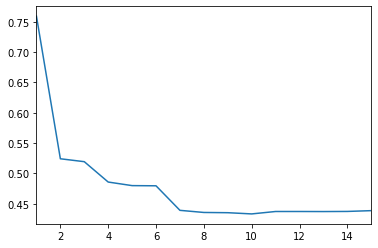

In [122]:
s.name='teste'
s.plot()

In [119]:
%debug

> c:\users\mauricio cordeiro\appdata\roaming\python\python36\site-packages\pandas-0.25.3-py3.6-win-amd64.egg\pandas\core\common.py(365)apply_if_callable()
    363 
    364     if callable(maybe_callable):
--> 365         return maybe_callable(obj, **kwargs)
    366 
    367     return maybe_callable



ipdb>  u


> c:\users\mauricio cordeiro\appdata\roaming\python\python36\site-packages\pandas-0.25.3-py3.6-win-amd64.egg\pandas\core\frame.py(2966)__getitem__()
   2964     def __getitem__(self, key):
   2965         key = lib.item_from_zerodim(key)
-> 2966         key = com.apply_if_callable(key, self)
   2967 
   2968         if is_hashable(key):



ipdb>  u


> c:\users\mauricio cordeiro\appdata\roaming\python\python36\site-packages\pandas-0.25.3-py3.6-win-amd64.egg\pandas\plotting\_matplotlib\core.py(420)_compute_plot_data()
    418         numeric_data = numeric_data.copy()
    419         for col in numeric_data:
--> 420             numeric_data[col] = np.asarray(numeric_data[col])
    421 
    422         self.data = numeric_data



ipdb>  q


In [108]:
cluster_bands = all_wls + all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None, optimize_metric=False)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.8978,0.9263,0.9274,0.9279,0.9279
MSE,40498.6,7670.93,5529.52,5448.47,5408.22,5414.45
RMSE,201.243,87.5839,74.3608,73.8137,73.5406,73.583
RMSLE,1.1131,0.6563,0.6505,0.5144,0.5047,0.5049
SSE,3.51933e+07,6.66604e+06,4.80516e+06,4.73472e+06,4.69974e+06,4.69974e+06
qty,869,869,869,869,869,868


In [62]:
cluster_bands = all_wls + all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None, optimize_metric=False, metric=BaseFit.rmse)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.6847,0.897,0.8975,0.8975,0.898,0.9286
MSE,23663.3,7728.89,7690.55,7689.33,7655.46,5357.16
RMSE,153.829,87.9141,87.6958,87.6888,87.4955,73.1926
RMSLE,1.7149,0.5109,0.4883,0.4783,0.4746,0.4641
SSE,2.05634e+07,6.71641e+06,6.68308e+06,6.68203e+06,6.6526e+06,4.65538e+06
qty,869,869,869,869,869,869


In [52]:
cluster_bands = all_wls + all_wls_norm
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm=None)
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4603,0.8979,0.898,0.9263,0.9308,0.9316
MSE,40498.6,7663.22,7657.84,5530.57,5191.34,5132.92
RMSE,201.243,87.5398,87.5091,74.3678,72.051,71.6444
RMSLE,1.1131,0.6266,0.5015,0.4889,0.486,0.4854
SSE,3.51933e+07,6.65934e+06,6.65466e+06,4.80606e+06,4.51128e+06,4.46051e+06
qty,869,869,869,869,869,869


In [53]:
cluster_bands = all_wls + all_wls_norm
fit_bands = s3bands + s3bands_norm + ['area', 'b865/b665']

mcluster = MultiClustering(rrs, cluster_bands, range_clusters=(1, 7), norm='Standard')
mcluster.fit(fit_bands, BaseFit.available_funcs, n_cpus=6, pool=None)

mcluster.summary()

,1,2,3,4,5,6
R^2,0.4646,0.8654,0.8975,0.8975,0.8971,0.9277
MSE,40179.7,10097.7,7690.25,7689.32,7724.36,5426.06
RMSE,200.449,100.487,87.6941,87.6888,87.8883,73.6618
RMSLE,1.1133,0.488,0.4864,0.4796,0.4703,0.4598
SSE,3.49161e+07,8.77493e+06,6.68283e+06,6.68202e+06,6.71247e+06,4.71525e+06
qty,869,869,869,869,869,869


In [85]:
fit_bands = s2bands + s2bands_norm + ['area', 'b865/b665']

gfit = GroupFit(rrs, fit_bands, funcs=BaseFit.available_funcs, group_column='Area2', n_cpus=6)
gfit.summary()

,func,band,R^2,MSE,RMSE,RMSLE,SSE,params,qty
Others,Exponential,783,0.8163,922.4704,30.3722,0.5173,2.675164e+04,"[2993.7346347057555, -2998.364285907205]",29
Indaia,Exponential,865,0.9433,415.3616,20.3804,0.2840,5.399701e+03,"[3574.59538079517, -3579.6264276717316]",13
Madeira,Power,b865/b665,0.8312,16413.4484,128.1150,0.3548,2.888767e+06,"[1873.8365347978174, 3.432988873006429, 68.997...",176
Paranapanema,Power,n705,0.8745,17.5488,4.1891,0.4173,7.195024e+02,"[1851739287.2506816, 3.082605160038968, -1.616...",41
Paranoa,Power,740,0.8127,4.9301,2.2204,0.4220,4.732899e+02,"[1926.329064360514, 0.9680930352210255, 0.9865...",96
Paraopeba,Power,n490,0.9958,2.3692,1.5392,0.1863,3.316870e+01,"[6.071075306782197e-08, -3.076777627476194, -3...",14
Purus,Power,area,0.9417,614.7387,24.7939,0.3994,2.090112e+04,"[0.08245251090463843, 2.397545715984037, 9.863...",34
Sao_Francisco,Power,n842,0.9867,45.1466,6.7191,0.0703,9.932247e+02,"[16562006.076990316, 1.7403171152372596, -5.48...",22
Solimoes_Amazonas,Exponential,b865/b665,0.7543,1141.5374,33.7866,0.3348,1.107291e+05,"[141.62849951022332, -172.47899920268966]",97
Maroni,Exponential,705,0.8991,4.0290,2.0072,0.0635,1.168397e+02,"[593.7681701533139, -594.021594542952]",29


In [92]:
gfit['Paranoa'].best_fit.fit_params['y']

Id
100     1.2
101     7.6
103    10.8
104     7.2
106     2.7
       ... 
203     5.4
204     5.0
205     1.1
206     7.2
207     2.9
Name: SPM, Length: 96, dtype: float64

In [98]:
gfit['Paranoa'].best_fit.fit_params['y_hat']<2

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False])

In [94]:
BaseFit.rmsle(gfit['Paranoa'].best_fit.fit_params['y'], gfit['Paranoa'].best_fit.fit_params['y_hat'])

0.4220329801758659

In [99]:
from sklearn.metrics import mean_squared_log_error

In [104]:
mean_squared_log_error([-1], [1])

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [105]:
np.where(gfit['Paranoa'].best_fit.fit_params['y_hat']<2)

(array([ 8,  9, 10, 11, 14, 17, 18, 19, 23, 24, 28, 29, 30, 34, 58, 76, 79,
        81, 84, 86, 87], dtype=int64),)

In [79]:
rrs['Area2'] = rrs['Area']

In [82]:
rrs.loc[rrs['Area'].isin(others.index), 'Area2'] = 'Others'

In [83]:
rrs['Area2'].value_counts()

Madeira              176
Negro                152
Solimoes_Amazonas     97
Paranoa               96
Ucayali               55
Solimoes_Varzea       47
Paranapanema          41
Purus                 34
Others                29
Maroni                29
Saut_Hermina          29
Sao_Francisco         22
Bagre                 21
Paraopeba             14
Mekong                14
Indaia                13
Name: Area2, dtype: int64